<a href="https://colab.research.google.com/github/srinidhi183/CODE---SRINIDHI-/blob/StatsandML/Day_3_100001318_stud_srh_university_de.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Load the Iris dataset

In [4]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']],
                    columns=iris_data['feature_names'] + ['species'])


# Rename columns for simplicity

In [5]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Map species to categorical names
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris['species'] = iris['species'].map(species_map)

# 1. T-Test: Compare mean petal lengths of Setosa vs Versicolor

In [6]:
setosa_petal_length = iris[iris['species'] == 'Setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'Versicolor']['petal_length']

t_stat, p_value = ttest_ind(setosa_petal_length, versicolor_petal_length)

print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")

T-Test Results: t-statistic = -39.492719391538095, p-value = 5.404910513441677e-62


Insights

In this analysis, I compared the mean petal lengths of Setosa and Versicolor using a t-test to check if there’s a significant difference.
The t-statistic measures the difference between the means relative to their variation, while the p-value tells us if this difference is statistically significant.


# 2. Z-Test: Test if mean sepal length of Setosa equals 5.0

In [7]:
# Z-test is applicable for n > 30 or known population std deviation
from statsmodels.stats.weightstats import ztest

setosa_sepal_length = iris[iris['species'] == 'Setosa']['sepal_length']
z_stat, z_p_value = ztest(setosa_sepal_length, value=5.0)

print(f"Z-Test Results: z-statistic = {z_stat}, p-value = {z_p_value}")

Z-Test Results: z-statistic = 0.12036212238318056, p-value = 0.9041962951772449


# 3. ANOVA: Compare mean petal widths across all three species

In [8]:
setosa_petal_width = iris[iris['species'] == 'Setosa']['petal_width']
versicolor_petal_width = iris[iris['species'] == 'Versicolor']['petal_width']
virginica_petal_width = iris[iris['species'] == 'Virginica']['petal_width']

f_stat, anova_p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

print(f"ANOVA Results: F-statistic = {f_stat}, p-value = {anova_p_value}")

ANOVA Results: F-statistic = 960.007146801809, p-value = 4.169445839443116e-85


# 4. Correlation/Regression: Explore relationship between sepal length and petal length

Pearson Correlation: 0.8717537758865831
                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.04e-47
Time:                        18:42:56   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const   

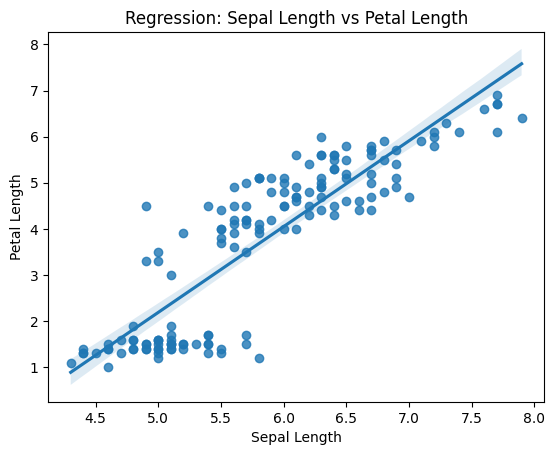

In [9]:
sepal_length = iris['sepal_length']
petal_length = iris['petal_length']

# Correlation
correlation, _ = pearsonr(sepal_length, petal_length)
print(f"Pearson Correlation: {correlation}")

# Regression
X = sm.add_constant(sepal_length)  # Add constant for intercept
model = sm.OLS(petal_length, X).fit()
print(model.summary())

# Scatter plot with regression line
sns.regplot(x=sepal_length, y=petal_length)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Regression: Sepal Length vs Petal Length')
plt.show()













For this step, I explored the relationship between sepal length and petal length using two approaches:

1. Correlation:
  I calculated Pearson's correlation coefficient to measure the strength and direction of the linear relationship:

  A value close to 1 indicates a strong positive correlation, meaning as sepal length increases, petal length also increases.
  A value near 0 suggests no linear relationship.
2. Regression:
  I performed a linear regression to predict petal length based on sepal length. The regression model provided:

The equation of the best-fit line.
Statistical measures like R-squared, which explains how much of the variability in petal length is explained by sepal length.
The p-values for coefficients to check if sepal length significantly contributes to predicting petal length.

Finally, I plotted a scatter plot with the regression line to visualize the relationship. This helped confirm whether the relationship is linear and how well the regression captures the trend.